<a href="https://colab.research.google.com/github/YuAn-Son/Statistics/blob/main/chapter2_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from matplotlib import rc
font_name = 'NanumBarunGothic'
rc('font', family = font_name)

# 6.1

In [ ]:
import pandas as pd

df = pd.read_csv('chap2_6.1.csv',header=0)
df

,업종,회사수,감축(%),동일수준(%),증가(%)
0,A,18.0,27.8,22.2,50.0
1,B,14.0,14.3,50.0,35.7
2,C,9.0,44.4,22.2,33.3
3,D,19.0,10.5,42.1,47.4
4,E,7.0,14.3,0.0,85.7
5,F,6.0,16.7,16.7,66.8
6,G,6.0,100.0,0.0,0.0
7,H,14.0,28.6,0.0,71.4
8,I,19.0,26.3,5.3,68.4
9,J,9.0,11.1,33.3,55.5


In [ ]:
df["증가"] = df["회사수"]*df["증가(%)"]/100
df["감축"] = df["회사수"]*df["감축(%)"]/100
df["동일수준"] = df["회사수"]*df["동일수준(%)"]/100
# 증가, 감축, 동일수준의 회사수 도출

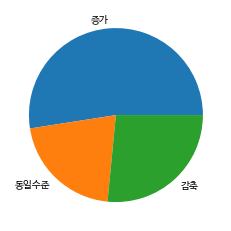

In [ ]:
import matplotlib.pyplot as plt

labels = '증가', '동일수준', '감축'
sizes = [sum(df['증가']), sum(df['동일수준']), sum(df['감축'])]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels)

plt.show()

In [ ]:
r_f = []
for i in range(len(sizes)):
    r_f.append(sizes[i]/sum(sizes)*100)
r_f # 상대도수

[52.46614072126129, 20.992752818005602, 26.54110646073311]

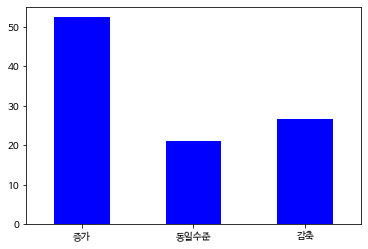

In [ ]:
table = pd.DataFrame(data=r_f, index=labels)
table.plot(kind='bar', color='blue',legend=False)
plt.xticks(rotation=1)
plt.show()

제조업체의 내년도 투자심리는 증가할 계획으로 예측된다.

# 6.2

In [ ]:
group = ['증가20이상', '증가20미만', '동일수준', '감축20이상', '감축20미만']
in_more = sum(df['증가'])*69.4/100
in_less = sum(df['증가'])*30.6/100
de_more = sum(df['감축'])*72.1/100
de_less = sum(df['감축'])*27.9/100
in_decrease = [in_more, in_less, sum(df['동일수준']), de_more, de_less]
# 금년대비 증감 예정 각 기업의 도수

fre_table = pd.DataFrame(data=in_decrease, index=group, columns=['도수'])
fre_table

,도수
증가20이상,58.984448
증가20미만,26.007552
동일수준,34.007000
감축20이상,30.999395
감축20미만,11.995605


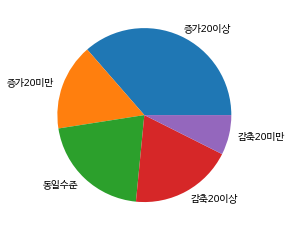

In [ ]:
fig2, ax2 = plt.subplots()
ax2.pie(in_decrease, labels=group)
plt.show()

금년대비 20% 이상 투자를 증가하기로 계획한 기업이 가장 많고,

투자 증가를 금년에 대비해 미미하게 하거나 동일수준으로 계획한 기업의 수는 비슷한 수치이며,

투자 감축을 계획한 기업은 다수의 기업이 20% 이상 감축할 예정임을 알 수 있다.

In [ ]:
pessimistic = fre_table.drop('증가20이상')
sum(pessimistic['도수'])/sum(fre_table['도수'])*100
#내년의 상황이 낙관적이지 안닥고 보는 기업의 퍼센트

63.588498339444655

# 6.3

In [3]:
import numpy as np
answer = np.array([4, 2, 1, 3, 3, 2, 4, 2, 1, 1, 2, 2, 2, 2, 1, 3, 4,
                  1, 4, 4, 1, 3, 2, 4, 1, 4, 3, 3, 1, 1, 1, 2, 1, 1,
                  4, 4, 4, 4, 4, 1, 2, 2, 2, 4, 4, 4, 1, 3, 4, 2])

In [4]:
import pandas as pd
table = pd.crosstab(index=answer, colnames=['보기'], columns='도수')
table.index = ["전적동의", "조금동의", "조금반대", "전적반대"]
table

보기,도수
전적동의,14
조금동의,13
조금반대,7
전적반대,16


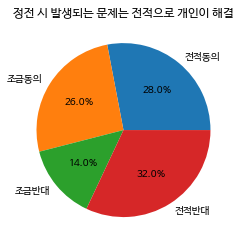

In [23]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.pie(np.array(table).ravel(), labels=table.index, autopct='%.1f%%') #ravel()- 다차원 변환을 일차원으로 변환
plt.title("정전 시 발생되는 문제는 전적으로 개인이 해결")
plt.show()

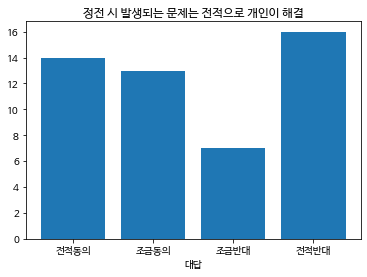

In [42]:
fig2, ax2 = plt.subplots()
ax2.bar(table.index, np.array(table).ravel())
ax2.set_xlabel("대답")
ax2.set_title("정전 시 발생되는 문제는 전적으로 개인이 해결")
plt.show()

# 6.14

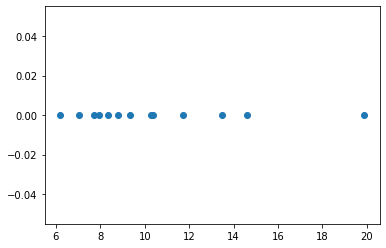

In [1]:
import matplotlib.pyplot as plt
y = []
data = [7.92, 10.29, 19.89 ,7.73, 10.36, 13.5, 8.81, 6.18, 7.02, 11.71, 8.33, 9.32, 14.61]
for i in range(len(data)):
    y.append(0)
plt.plot(data, y, marker='o', linewidth=0)
plt.show()

# 6.16

In [4]:
import numpy as np
ozone_concentration = np.array([3.5, 6.8, 2.4, 6.8, 5.5, 6.2, 5.7, 9.4, 6.8,
                                6.6, 1.4, 2.5, 3.0, 1.7, 1.1, 7.5, 5.8, 3.4,
                                3.1, 4.4, 6.6, 5.4, 5.6, 5.3, 5.1, 6.2, 3.1,
                                5.8, 4.7, 5.7, 6.0, 4.4, 4.7, 4.7, 5.6, 6.0,
                                5.8, 7.6, 3.8, 4.5, 4.2, 5.4, 6.5, 7.4, 5.5,
                                5.8, 1.6, 1.4, 5.9, 3.7, 4.4, 4.7, 3.0, 6.0,
                                1.4, 2.8, 2.5, 3.7, 3.3, 9.4, 5.3, 3.5, 4.1,
                                6.7, 3.9, 6.1, 8.1, 2.0, 6.2, 5.6, 4.0, 3.4,
                                11.7, 6.6, 4.1, 6.6, 3.7, 7.6])

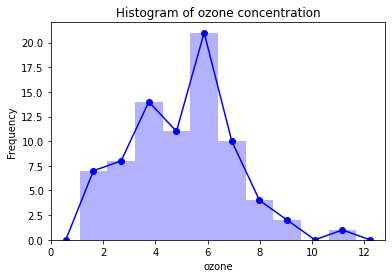

In [5]:
import matplotlib.pyplot as plt
plt.figure()
n, bins, patches = plt.hist(ozone_concentration, bins = 10, facecolor='blue', alpha=0.3)
x = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
w_bin = bins[1]-bins[0]
x.insert(0,x[0]-w_bin)
x.append(x[-1]+w_bin)
n = np.insert(n,0,0.0)
n = np.append(n,0.0)
plt.xlabel('ozone')
plt.ylabel('Frequency')
plt.title("Histogram of ozone concentration")
plt.plot(x,n,'blue',marker='o')
plt.show()